In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the data
adult = pd.read_csv('adult.csv', sep=',', decimal='.', header=None, names=['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Income'])

In [3]:
# Check the data
print(adult)

       Age         Work Class  Final Weight      Education  Education Number  \
0       39          State-gov         77516      Bachelors                13   
1       50   Self-emp-not-inc         83311      Bachelors                13   
2       38            Private        215646        HS-grad                 9   
3       53            Private        234721           11th                 7   
4       28            Private        338409      Bachelors                13   
5       37            Private        284582        Masters                14   
6       49            Private        160187            9th                 5   
7       52   Self-emp-not-inc        209642        HS-grad                 9   
8       31            Private         45781        Masters                14   
9       42            Private        159449      Bachelors                13   
10      37            Private        280464   Some-college                10   
11      30          State-gov        141

In [4]:
# Verify the data
adult.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Check for Missing Values and its count
adult.isna().sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours Per Week      0
Native Country      0
Income              0
dtype: int64

In [6]:
# Check for datatypes
adult.dtypes

Age                  int64
Work Class          object
Final Weight         int64
Education           object
Education Number     int64
Marital Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital Gain         int64
Capital Loss         int64
Hours Per Week       int64
Native Country      object
Income              object
dtype: object

In [7]:
# Check all values present in the column and its count
adult['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

In [8]:
# Check all values present in the column and its count
adult['Work Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work Class, dtype: int64

In [9]:
# Remove the rows with incorrect values
adult = adult[adult['Work Class'] != ' ?']

In [10]:
# Re-check all values present in the column and its count
adult['Work Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work Class, dtype: int64

In [11]:
# Check all values present in the column and its count
adult['Final Weight'].value_counts()

203488     13
164190     13
148995     12
121124     12
113364     12
123011     12
126675     12
126569     11
120131     11
241998     11
190290     11
102308     11
155659     11
120277     11
188246     11
111483     11
193882     10
216129     10
125461     10
119793     10
112497     10
155489     10
99185      10
125892     10
186934     10
174789     10
177675     10
194630     10
125933     10
82393       9
           ..
120451      1
405083      1
263729      1
177791      1
204410      1
111545      1
194167      1
311913      1
220786      1
177775      1
110188      1
462440      1
63079       1
349795      1
210527      1
343646      1
67794       1
110172      1
34393       1
288341      1
239415      1
118352      1
48718       1
599629      1
142924      1
1268339     1
542265      1
312897      1
58447       1
229376      1
Name: Final Weight, Length: 20498, dtype: int64

In [12]:
# Check all values present in the column and its count
adult['Education Number'].value_counts()

9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: Education Number, dtype: int64

In [13]:
# Check all values present in the column and its count
adult['Marital Status'].value_counts()

 Married-civ-spouse       14340
 Never-married             9917
 Divorced                  4259
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

In [14]:
# Check all values present in the column and its count
adult['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: Occupation, dtype: int64

In [15]:
# Remove the rows with incorrect values
adult = adult[adult['Occupation'] != ' ?']

In [16]:
# Re-check all values present in the column and its count
adult['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [17]:
# Check all values present in the column and its count
adult['Relationship'].value_counts()

 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: Relationship, dtype: int64

In [18]:
# Check all values present in the column and its count
adult['Race'].value_counts()

 White                 26301
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: Race, dtype: int64

In [19]:
# Check all values present in the column and its count
adult['Sex'].value_counts()

 Male      20788
 Female     9930
Name: Sex, dtype: int64

In [20]:
# Check all values present in the column and its count
adult['Capital Gain'].value_counts()

0        28129
15024      343
7688       278
7298       244
99999      155
3103        94
5178        93
4386        69
5013        69
3325        53
8614        52
2174        48
10520       43
4064        41
4650        40
14084       40
3137        37
20051       34
27828       33
3908        31
2829        31
594         29
6849        26
14344       26
13550       26
2885        22
4787        22
3411        21
2176        21
1055        21
         ...  
2050         3
4687         3
1424         3
6767         3
5721         3
7896         3
34095        3
2961         2
3456         2
6723         2
2062         2
41310        2
11678        2
3432         2
25124        2
2009         2
18481        2
5060         1
7978         1
2538         1
2993         1
2387         1
1455         1
1173         1
6097         1
22040        1
401          1
1086         1
4931         1
1639         1
Name: Capital Gain, Length: 118, dtype: int64

In [21]:
# Check all values present in the column and its count
adult['Capital Loss'].value_counts()

0       29257
1902      199
1977      167
1887      157
1848       50
1485       48
2415       48
1740       42
1590       39
1876       39
1602       35
1672       34
2258       25
1564       25
1669       24
1741       23
1980       23
1408       21
2001       21
2051       21
1579       20
2002       20
1719       20
2377       18
1974       18
2339       16
1504       16
1721       16
2179       14
1628       14
        ...  
1825        3
653         3
1755        2
3770        2
1138        2
810         2
1648        2
3004        2
3900        2
974         2
2352        2
1735        2
3683        2
1816        2
2238        2
2149        2
2754        2
2457        1
2080        1
1844        1
1944        1
2472        1
1411        1
1539        1
4356        1
419         1
2282        1
155         1
2467        1
2201        1
Name: Capital Loss, Length: 90, dtype: int64

In [22]:
# Check all values present in the column and its count
adult['Hours Per Week'].value_counts()

40    14525
50     2763
45     1791
60     1441
35     1203
20     1066
30     1010
55      684
25      582
48      503
38      464
15      350
70      284
65      242
32      239
10      226
24      220
42      215
44      210
36      205
16      182
43      148
37      146
12      143
52      137
80      124
8       103
56       91
46       81
99       80
      ...  
19       14
51       13
85       13
68       12
98       11
63       10
11        9
78        8
1         8
77        6
29        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
95        2
97        2
88        2
86        2
61        2
94        1
87        1
74        1
82        1
92        1
Name: Hours Per Week, Length: 94, dtype: int64

In [23]:
# Check all values present in the column and its count
adult['Native Country'].value_counts()

 United-States                 27504
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [24]:
# Remove the rows with incorrect values
adult = adult[adult['Native Country'] != ' ?']

In [25]:
# Re-check all values present in the column and its count
adult['Native Country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [26]:
# Check all values present in the column and its count
adult['Income'].value_counts()

 <=50K    22654
 >50K      7508
Name: Income, dtype: int64

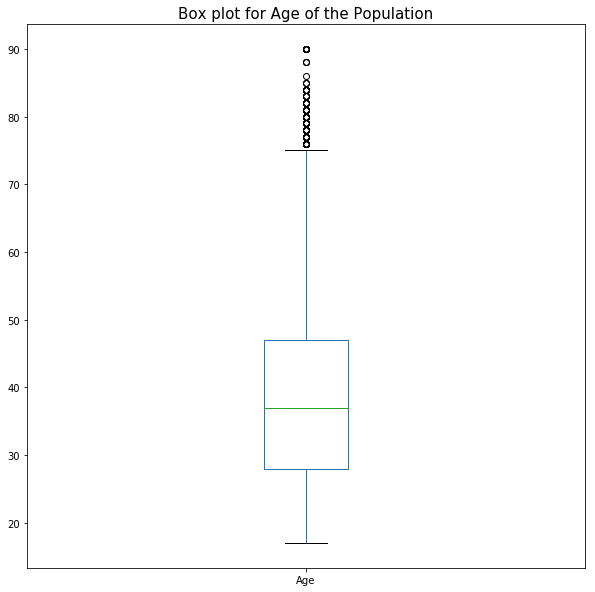

In [27]:
#Plot Box plot for Age Column
adult['Age'].plot(kind='box', figsize=(10,10))
plt.title('Box plot for Age of the Population', fontsize=15)
plt.suptitle('')
plt.show()

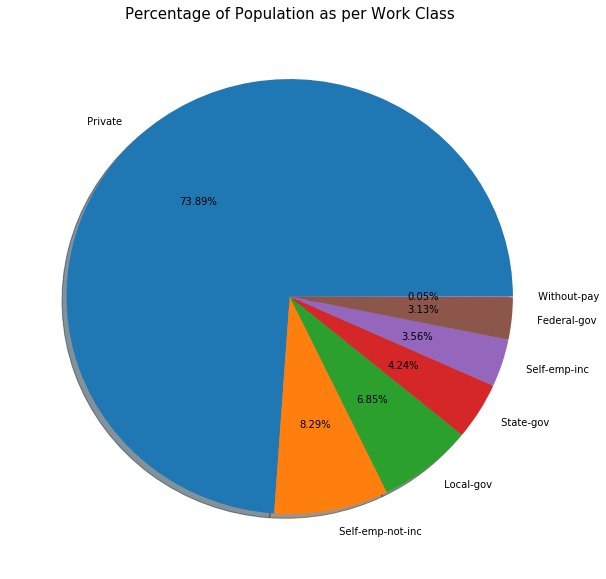

In [28]:
#Plot Pie chart for Work Class Column
adult['Work Class'].value_counts().plot(kind='pie',autopct='%.2f%%', shadow=True, figsize=(10,10))
plt.ylabel('')
plt.title('Percentage of Population as per Work Class', fontsize=15)
plt.show()

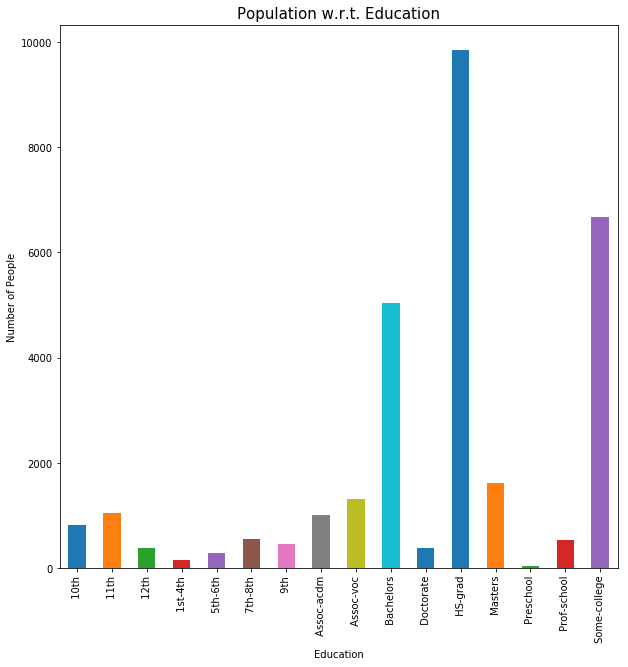

In [29]:
#Plot Bar chart for Education column
adult['Education'].value_counts().sort_index().plot(kind='bar', figsize=(10,10))
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.title('Population w.r.t. Education', fontsize=15)
plt.show()

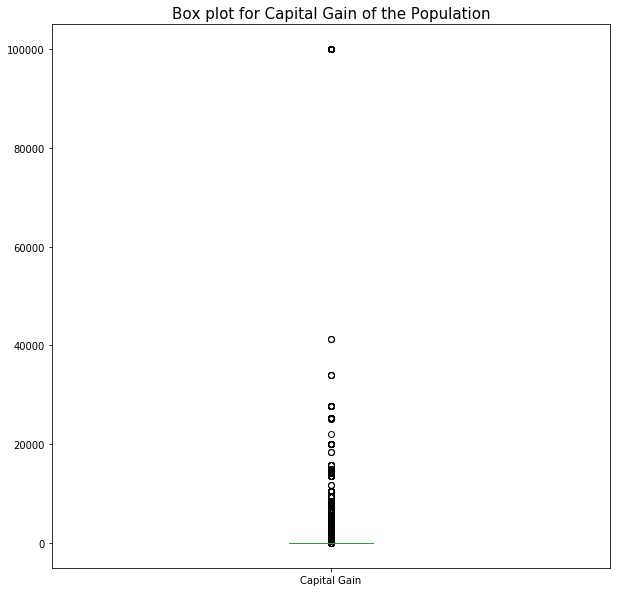

In [30]:
#Plot Box plot for Capital Gain Column
adult['Capital Gain'].plot(kind='box', figsize=(10,10))
plt.title('Box plot for Capital Gain of the Population', fontsize=15)
plt.suptitle('')
plt.show()

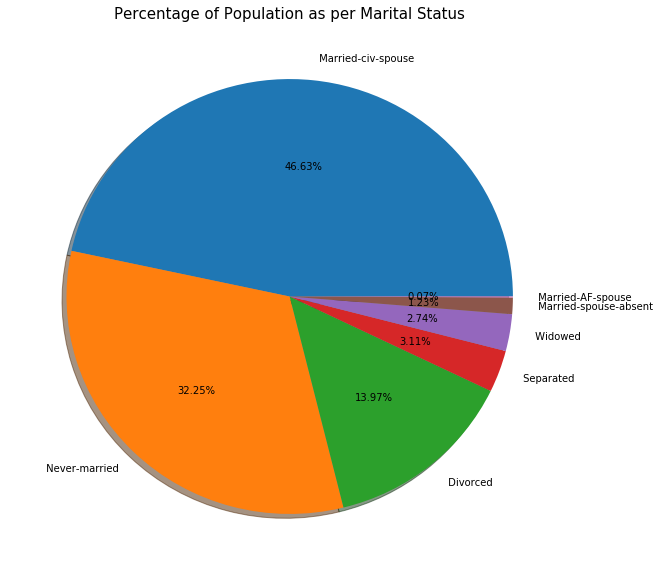

In [31]:
#Plot Pie chart for Marital Status Column
adult['Marital Status'].value_counts().plot(kind='pie',autopct='%.2f%%', shadow=True, figsize=(10,10))
plt.ylabel('')
plt.title('Percentage of Population as per Marital Status', fontsize=15)
plt.show()

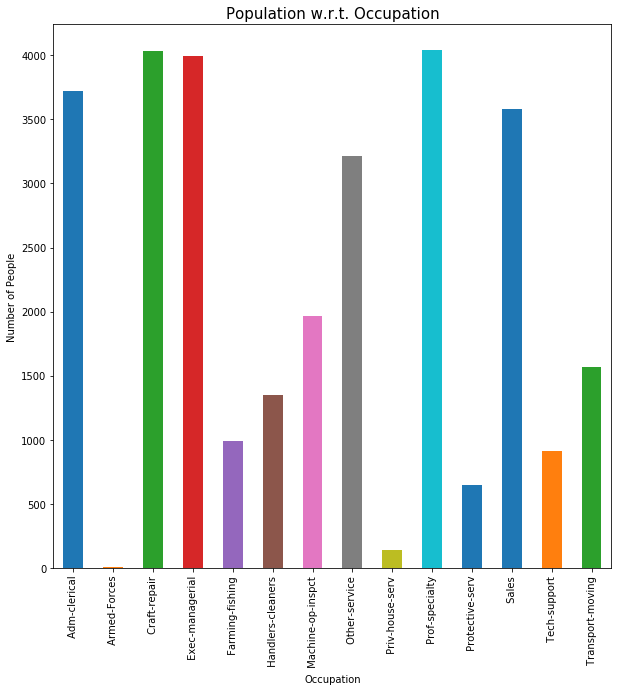

In [32]:
#Plot Bar chart for Occupation column
adult['Occupation'].value_counts().sort_index().plot(kind='bar', figsize=(10,10))
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.title('Population w.r.t. Occupation', fontsize=15)
plt.show()

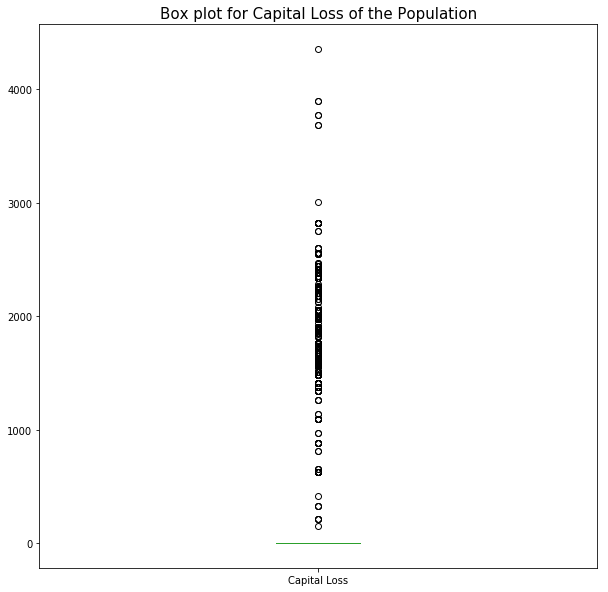

In [33]:
#Plot Box plot for Capital Loss Column
adult['Capital Loss'].plot(kind='box', figsize=(10,10))
plt.title('Box plot for Capital Loss of the Population', fontsize=15)
plt.suptitle('')
plt.show()

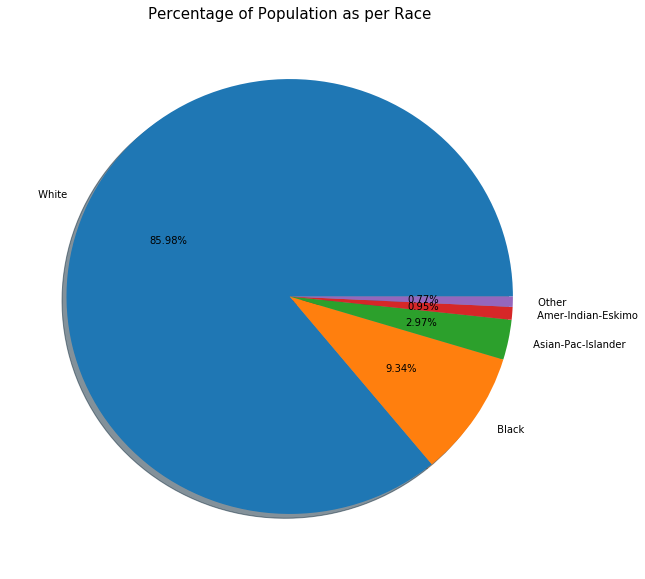

In [34]:
#Plot Pie chart for Race Column
adult['Race'].value_counts().plot(kind='pie',autopct='%.2f%%', shadow=True, figsize=(10,10))
plt.ylabel('')
plt.title('Percentage of Population as per Race', fontsize=15)
plt.show()

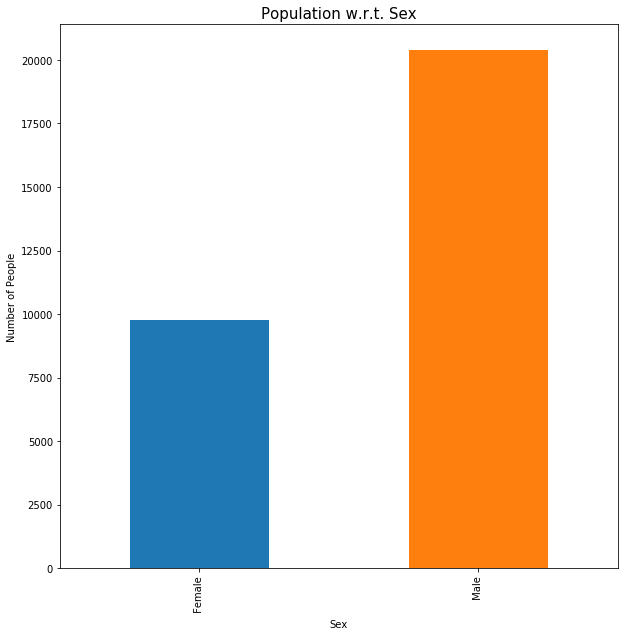

In [35]:
#Plot Bar chart for Sex column
adult['Sex'].value_counts().sort_index().plot(kind='bar', figsize=(10,10))
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.title('Population w.r.t. Sex', fontsize=15)
plt.show()

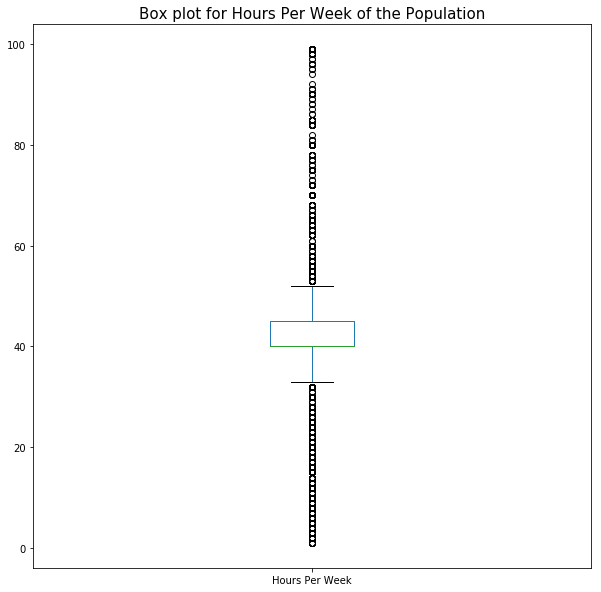

In [36]:
#Plot Box plot for Hours Per Week Column
adult['Hours Per Week'].plot(kind='box', figsize=(10,10))
plt.title('Box plot for Hours Per Week of the Population', fontsize=15)
plt.suptitle('')
plt.show()

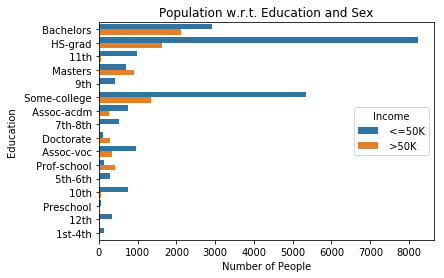

In [37]:
#Plot Bar chart for Income w.r.t. Education
ax = sns.countplot(y='Education', hue='Income', data=adult)
ax.set_title('Population w.r.t. Education and Sex')
ax.set(xlabel='Number of People', ylabel='Education')
plt.show()

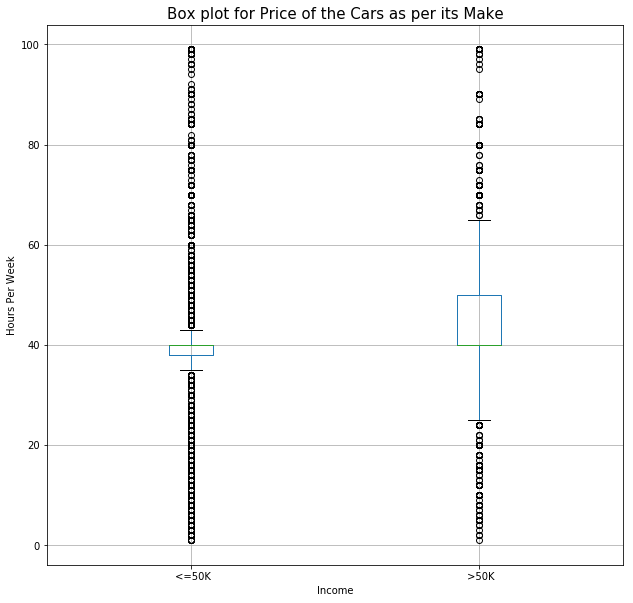

In [38]:
#Plot Box plot for Income w.r.t. Hours Per Week
adult.boxplot(column='Hours Per Week', by='Income', figsize=(10,10))
plt.ylabel('Hours Per Week')
plt.title('Box plot for Price of the Cars as per its Make', fontsize=15)
plt.suptitle('')
plt.show()

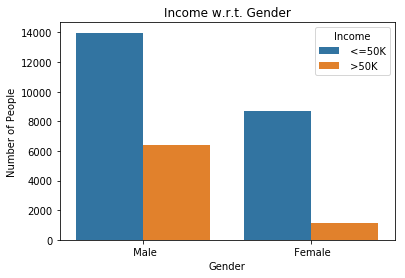

In [39]:
#Plot Bar chart for Income w.r.t. Gender
ax = sns.countplot(x='Sex', hue='Income', data=adult)
ax.set_title('Income w.r.t. Gender')
ax.set(xlabel='Gender', ylabel='Number of People')
plt.show()

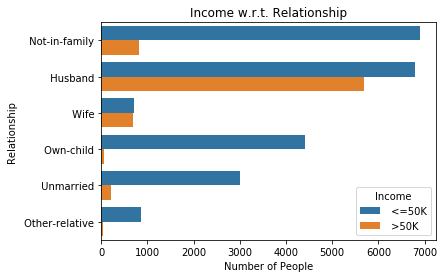

In [40]:
#Plot Bar chart for Income w.r.t. Relationship
ax = sns.countplot(y='Relationship', hue='Income', data=adult)
ax.set_title('Income w.r.t. Relationship')
ax.set(ylabel='Relationship', xlabel='Number of People')
plt.show()

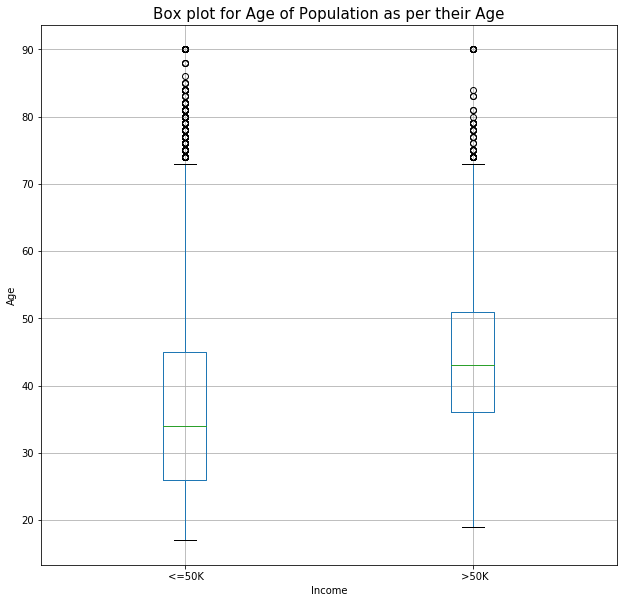

In [41]:
#Plot Box plot for Income w.r.t. Age
adult.boxplot(column='Age', by='Income', figsize=(10,10))
plt.ylabel('Age')
plt.title('Box plot for Age of Population as per their Age', fontsize=15)
plt.suptitle('')
plt.show()

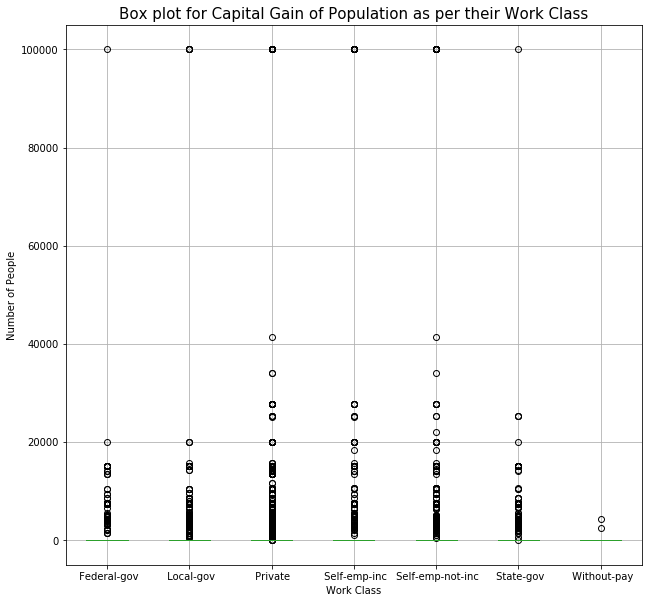

In [42]:
#Plot Box plot for Capital Gain w.r.t. Work Class
adult.boxplot(column='Capital Gain', by='Work Class', figsize=(10,10))
plt.ylabel('Number of People')
plt.title('Box plot for Capital Gain of Population as per their Work Class', fontsize=15)
plt.suptitle('')
plt.show()

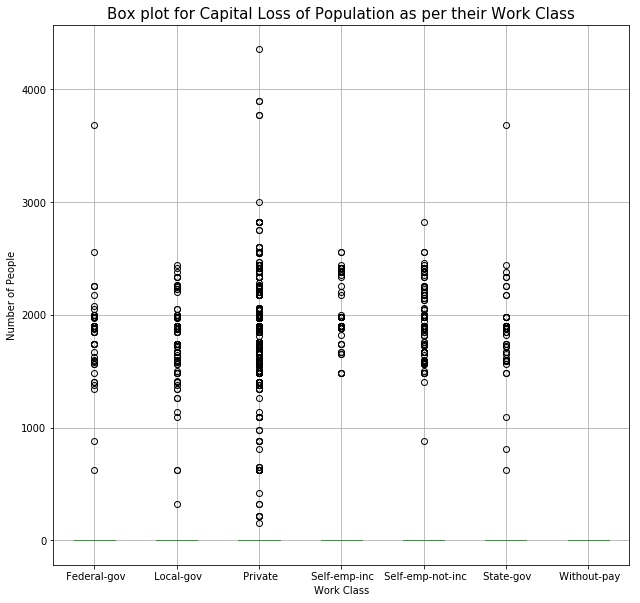

In [43]:
#Plot Box plot for Capital Loss w.r.t. Work Class
adult.boxplot(column='Capital Loss', by='Work Class', figsize=(10,10))
plt.ylabel('Number of People')
plt.title('Box plot for Capital Loss of Population as per their Work Class', fontsize=15)
plt.suptitle('')
plt.show()

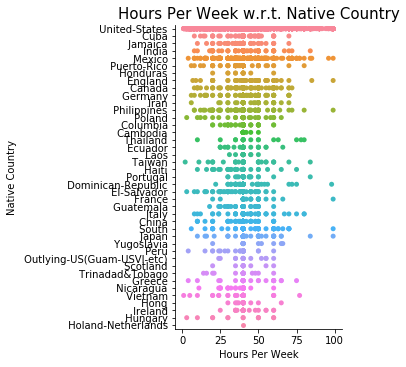

In [44]:
# Cat Plot for Hours Per Week w.r.t. Native Country
ax = sns.catplot(x="Hours Per Week", y="Native Country", jitter=False, data=adult)
plt.title('Hours Per Week w.r.t. Native Country', fontsize=15)
plt.show()

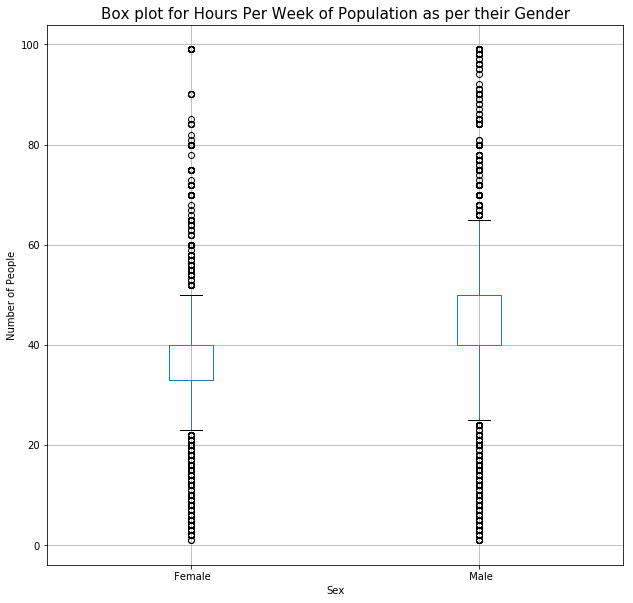

In [45]:
#Plot Box plot for Hours Per Week w.r.t. Gender
adult.boxplot(column='Hours Per Week', by='Sex', figsize=(10,10))
plt.ylabel('Number of People')
plt.title('Box plot for Hours Per Week of Population as per their Gender', fontsize=15)
plt.suptitle('')
plt.show()

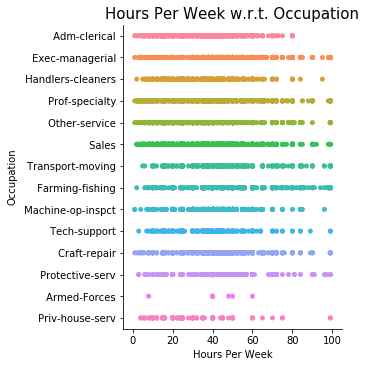

In [46]:
# Cat Plot for Hours Per Week w.r.t. Education
ax = sns.catplot(x="Hours Per Week", y="Occupation", jitter=False, data=adult)
plt.title('Hours Per Week w.r.t. Occupation', fontsize=15)
plt.show()

C:\Users\Abhisar\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


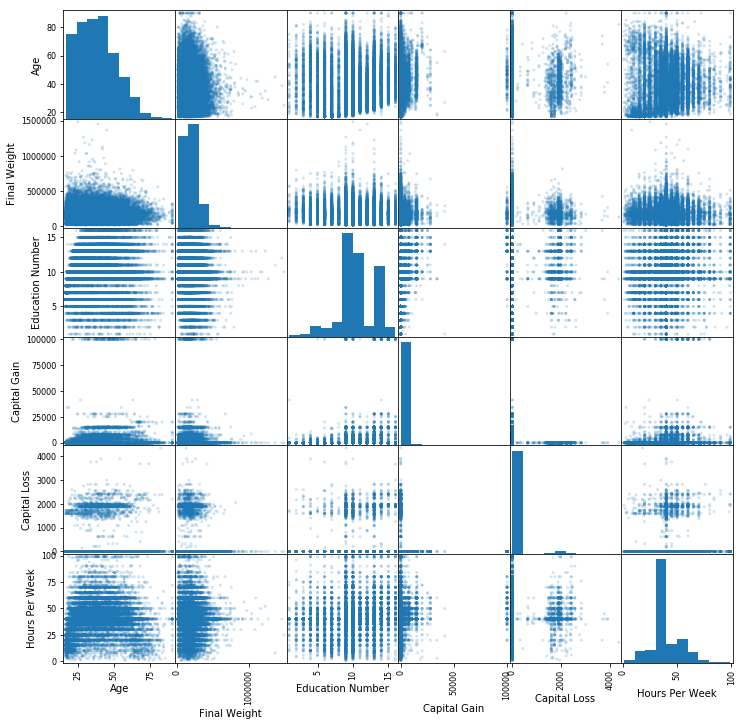

In [47]:
#Plot Scatter Matrix for all numerical columns
scatter_matrix(adult, alpha=0.2, figsize=(12,12))
plt.show()

In [48]:
# Drop the column Education as it is redundant (Education Number is enough to proceed further)
adult = adult.drop(columns=['Education'])

In [49]:
# Apply interger labels on data set instead of string values
adult = adult.apply(LabelEncoder().fit_transform)

In [50]:
# Verify the data set after labelling
adult.head()

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,22,5,2491,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,12,2,9,5,2,0,0,0,39,4,0


In [51]:
# Divide the data set into factors and its results
X_data = adult.iloc[:, :13]
y_data = adult.iloc[:, 13]

In [52]:
# Verify the divided data sets
X_data.head()

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country
0,22,5,2491,12,4,0,1,4,1,24,0,39,38
1,33,4,2727,12,2,3,0,4,1,0,0,12,38
2,21,2,13188,8,0,5,1,4,1,0,0,39,38
3,36,2,14354,6,2,5,0,2,1,0,0,39,38
4,11,2,18120,12,2,9,5,2,0,0,0,39,4


In [53]:
# Verify the divided data sets
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [54]:
# Feature Selection of 10 best features present in our data set
fs_selectKBest = fs.SelectKBest(fs.f_classif, k=10)
fs_selectKBest.fit_transform(X_data, y_data)
fs_index = np.argsort(fs_selectKBest.scores_)[::-1][0:10]

# Filter the data set with only the 10 best selected features
X_data = X_data[X_data.columns[fs_index][0:10].values]
X_data.head()

,Capital Gain,Education Number,Relationship,Age,Hours Per Week,Sex,Marital Status,Capital Loss,Race,Occupation
0,24,12,1,22,39,1,4,0,4,0
1,0,12,0,33,12,1,2,0,4,3
2,0,8,1,21,39,1,0,0,4,5
3,0,6,0,36,39,1,2,0,2,5
4,0,12,5,11,39,0,2,0,2,9


In [55]:
# Splitting of 50% Training and 50% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=2)

# Predicting results using K-Nearest Neighbour algorithm 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
print '\nConfusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\nClassification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_knn = knn.score(X_test,y_test)
print 'Accuracy of the K-Nearest Neighbour Model is: ', score_knn


Confusion Matrix:
[[10067  1212]
 [ 1494  2308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11279
           1       0.66      0.61      0.63      3802

   micro avg       0.82      0.82      0.82     15081
   macro avg       0.76      0.75      0.76     15081
weighted avg       0.82      0.82      0.82     15081

Accuracy of the K-Nearest Neighbour Model is:  0.8205689277899344


In [56]:
# Splitting of 60% Training and 40% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=2)

# Predicting results using K-Nearest Neighbour algorithm 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
print '\nConfusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\nClassification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_knn = knn.score(X_test,y_test)
print 'Accuracy of the K-Nearest Neighbour Model is: ', score_knn


Confusion Matrix:
[[8090  918]
 [1220 1837]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9008
           1       0.67      0.60      0.63      3057

   micro avg       0.82      0.82      0.82     12065
   macro avg       0.77      0.75      0.76     12065
weighted avg       0.82      0.82      0.82     12065

Accuracy of the K-Nearest Neighbour Model is:  0.8227932034811438


In [57]:
# Splitting of 80% Training and 20% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

# Predicting results K-Nearest Neighbour algorithm 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
print '\n', 'Confusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\n', 'Classification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_knn = knn.score(X_test,y_test)
print 'Accuracy of the K-Nearest Neighbour Model is: ', score_knn


Confusion Matrix:
[[4063  445]
 [ 608  917]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4508
           1       0.67      0.60      0.64      1525

   micro avg       0.83      0.83      0.83      6033
   macro avg       0.77      0.75      0.76      6033
weighted avg       0.82      0.83      0.82      6033

Accuracy of the K-Nearest Neighbour Model is:  0.8254599701640974


In [58]:
# Splitting of 50% Training and 50% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=2)

# Predicting results Decision Tree algorithm 
clf = DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)
y_pred = dt.predict(X_test)   

# Confusion Matrix
print '\n', 'Confusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\n', 'Classification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_dt = clf.score(X_test,y_test)
print 'Accuracy of the Decision Tree Model is: ', score_dt 


Confusion Matrix:
[[9894 1385]
 [1499 2303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     11279
           1       0.62      0.61      0.61      3802

   micro avg       0.81      0.81      0.81     15081
   macro avg       0.75      0.74      0.74     15081
weighted avg       0.81      0.81      0.81     15081

Accuracy of the Decision Tree Model is:  0.8087659969498044


In [59]:
# Splitting of 60% Training and 40% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=2)

# Predicting results K-Nearest Neighbour algorithm 
clf = DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)
y_pred = dt.predict(X_test)   

# Confusion Matrix
print '\n', 'Confusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\n', 'Classification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_dt = clf.score(X_test,y_test)
print 'Accuracy of the Decision Tree Model is: ', score_dt 


Confusion Matrix:
[[7939 1069]
 [1239 1818]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      9008
           1       0.63      0.59      0.61      3057

   micro avg       0.81      0.81      0.81     12065
   macro avg       0.75      0.74      0.74     12065
weighted avg       0.81      0.81      0.81     12065

Accuracy of the Decision Tree Model is:  0.8087028595109822


In [60]:
# Splitting of 80% Training and 20% Testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

# Predicting results K-Nearest Neighbour algorithm 
clf = DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Confusion Matrix
print '\n', 'Confusion Matrix:'
print confusion_matrix(y_test, y_pred)

# Classification Report
print '\n', 'Classification Report:'
print classification_report(y_test, y_pred)

# Accuracy Rate
score_dt = clf.score(X_test,y_test)
print 'Accuracy of the Decision Tree Model is: ', score_dt 


Confusion Matrix:
[[4014  494]
 [ 623  902]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4508
           1       0.65      0.59      0.62      1525

   micro avg       0.81      0.81      0.81      6033
   macro avg       0.76      0.74      0.75      6033
weighted avg       0.81      0.81      0.81      6033

Accuracy of the Decision Tree Model is:  0.8148516492623902
